# Taller splines cubicos

Nombre: Lenin Vasquez

Dado el puntos $x = [0, 1, 2]$ y $y = [-12, 2, -4]$

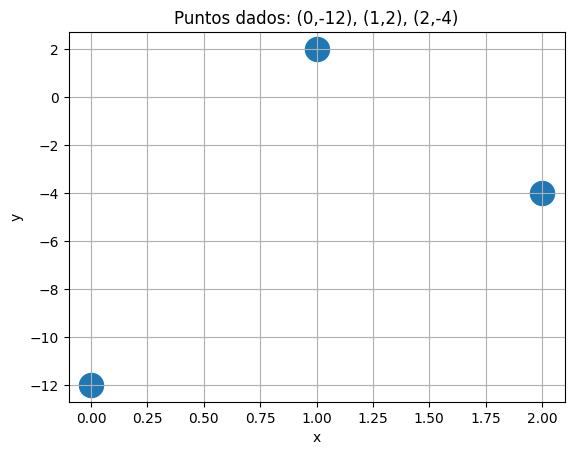

In [1]:
import matplotlib.pyplot as plt

# Puntos dados
x = [0, 1, 2]
y = [-12, 2, -4]

# Crear figura
plt.figure()

# Dibujar solo los puntos (grandes)
plt.scatter(x, y, s=300)

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Puntos dados: (0,-12), (1,2), (2,-4)")

# Cuadrícula
plt.grid(True)

# Mostrar gráfica
plt.show()


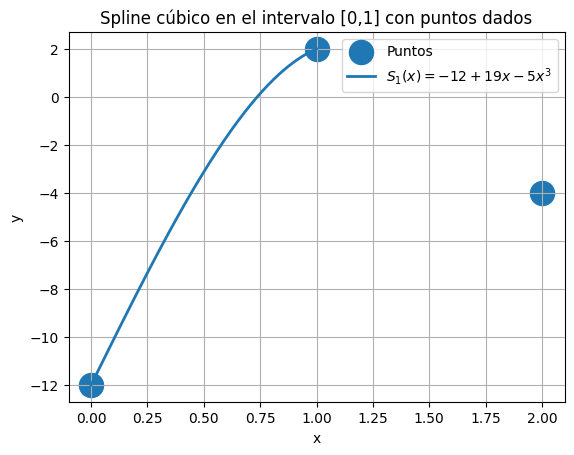

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos dados
x_points = [0, 1, 2]
y_points = [-12, 2, -4]

# Función S1(x) para el intervalo [0,1]
def S1(x):
    return -12 + 19*x - 5*x**3

# Generar valores para dibujar S1(x)
x_curve = np.linspace(0, 1, 200)
y_curve = S1(x_curve)

# Crear figura
plt.figure()

# Dibujar los puntos (grandes)
plt.scatter(x_points, y_points, s=300, label="Puntos")

# Dibujar la función S1(x)
plt.plot(x_curve, y_curve, linewidth=2, label=r"$S_1(x) = -12 + 19x - 5x^3$")

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline cúbico en el intervalo [0,1] con puntos dados")

# Cuadrícula
plt.grid(True)

# Leyenda
plt.legend()

# Mostrar gráfica
plt.show()


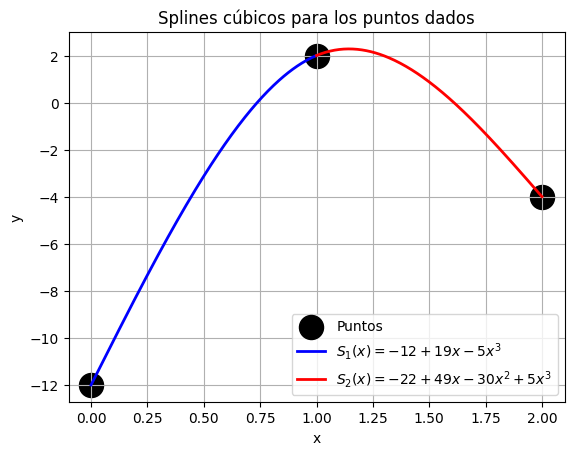

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos dados
x_points = [0, 1, 2]
y_points = [-12, 2, -4]

# Funciones del spline
def S1(x):
    return -12 + 19*x - 5*x**3

def S2(x):
    return -22 + 49*x - 30*x**2 + 5*x**3

# Intervalos
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)

# Evaluar
y1 = S1(x1)
y2 = S2(x2)

# Crear figura
plt.figure()

# Puntos
plt.scatter(x_points, y_points, s=300, label="Puntos", color="black")

# Spline S1 (color azul)
plt.plot(x1, y1, linewidth=2, color="blue", 
         label=r"$S_1(x) = -12 + 19x - 5x^3$")

# Spline S2 (color rojo)
plt.plot(x2, y2, linewidth=2, color="red", 
         label=r"$S_2(x) = -22 + 49x - 30x^2 + 5x^3$")

# Etiquetas
plt.xlabel("x")
plt.ylabel("y")
plt.title("Splines cúbicos para los puntos dados")

# Cuadrícula
plt.grid(True)

# Leyenda
plt.legend()

# Mostrar gráfica
plt.show()


## Compruebe gráficamente la solución de los siguientes ejercicios:
1. $$(0,1), (1,5), (2,3)$$
2. $$(0,-5), (1,-4), (2,3)$$
3. $$(0,-1), (1,1), (2,5), (3,2)$$


### Ejercicio 01: $$(0,1), (1,5), (2,3)$$

- $x_0=0, y_0=1,$
- $x_1=1, y_1=5$
- $x_2=2, y_2=3$
* Sacamos las ecuaciones

$$S_0(x)=\frac{0(1-x)^3}{6}+\frac{-9(x-0)^3}{6}+\left(1-\frac{0\cdot 1^2}{6}\right)(1-x)+\left(5-\frac{-9\cdot 1^2}{6}\right)x$$


$$S_0(x)=\frac{-3x^3}{2}+(1-x)+\left(\frac{13}{2}\right)x$$


$$S_1(x)=\frac{-9(2-x)^3}{6}\;+\;\frac{0(x-1)^3}{6}\;+\;\left(5-\frac{-9\cdot 1^2}{6}\right)(2-x)\;+\;\left(3-\frac{0\cdot 1^2}{6}\right)(x-1)$$


$$S_1(x)=\frac{-3(2-x)^3}{2}\;+\;\left(\frac{13}{2}\right)(2-x)\;+\;\left(3\right)(x-1)$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- CÁLCULO DE LOS SPLINES ----------

def cubic_spline_natural(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    n = len(x)

    h = np.diff(x)

    # Sistema para las segundas derivadas M
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Condiciones de frontera natural
    A[0, 0] = 1.0
    A[-1, -1] = 1.0

    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i]     = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    M = np.linalg.solve(A, b)

    a = y[:-1].copy()
    b_coef = np.zeros(n - 1)
    c_coef = np.zeros(n - 1)
    d_coef = np.zeros(n - 1)

    for i in range(n - 1):
        b_coef[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * M[i] + M[i + 1]) / 6
        c_coef[i] = M[i] / 2
        d_coef[i] = (M[i + 1] - M[i]) / (6 * h[i])

    return a, b_coef, c_coef, d_coef


def cubic_spline_clamped(x, y, B0, Bn):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    n = len(x)

    h = np.diff(x)

    A = np.zeros((n, n))
    b = np.zeros(n)

    # Condición de frontera en x0: S'(x0) = B0
    A[0, 0] = 2 * h[0]
    A[0, 1] = h[0]
    b[0] = 6 * ((y[1] - y[0]) / h[0] - B0)

    # Ecuaciones internas
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i]     = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])

    # Condición de frontera en xn: S'(xn) = Bn
    A[-1, -2] = h[-1]
    A[-1, -1] = 2 * h[-1]
    b[-1] = 6 * (Bn - (y[-1] - y[-2]) / h[-1])

    M = np.linalg.solve(A, b)

    a = y[:-1].copy()
    b_coef = np.zeros(n - 1)
    c_coef = np.zeros(n - 1)
    d_coef = np.zeros(n - 1)

    for i in range(n - 1):
        b_coef[i] = (y[i + 1] - y[i]) / h[i] - h[i] * (2 * M[i] + M[i + 1]) / 6
        c_coef[i] = M[i] / 2
        d_coef[i] = (M[i + 1] - M[i]) / (6 * h[i])

    return a, b_coef, c_coef, d_coef

# ---------- IMPRESIÓN Y GRÁFICA ----------

def print_spline_equations(x, coeffs, titulo):
    a, b, c, d = coeffs
    print("\n" + titulo)
    for i in range(len(a)):
        xi = x[i]
        xf = x[i + 1]
        print(
            f"Intervalo [{xi}, {xf}]: "
            f"S_{i}(x) = {a[i]:.4f} "
            f"+ {b[i]:.4f}(x-{xi}) "
            f"+ {c[i]:.4f}(x-{xi})^2 "
            f"+ {d[i]:.4f}(x-{xi})^3"
        )

def eval_spline(x_nodes, coeffs, x_eval):
    a, b, c, d = coeffs
    x_eval = np.array(x_eval, dtype=float)
    y_eval = np.zeros_like(x_eval, dtype=float)

    for i in range(len(a)):
        if i == len(a) - 1:
            mask = (x_eval >= x_nodes[i]) & (x_eval <= x_nodes[i + 1])
        else:
            mask = (x_eval >= x_nodes[i]) & (x_eval < x_nodes[i + 1])

        dx = x_eval[mask] - x_nodes[i]
        y_eval[mask] = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3

    return y_eval

def plot_spline(x, y, coeffs_nat, coeffs_clamp, B1, titulo):
    xs = np.linspace(x[0], x[-1], 300)
    ys_nat = eval_spline(x, coeffs_nat, xs)
    ys_clamp = eval_spline(x, coeffs_clamp, xs)

    plt.figure()
    plt.scatter(x, y, label="Puntos")
    plt.plot(xs, ys_nat, label="Natural")
    plt.plot(xs, ys_clamp, label=f"Condicionada B₁={B1}")
    plt.title(titulo)
    plt.grid(True)
    plt.legend()
    plt.show()



FRONTERA NATURAL
Intervalo [0, 1]: S_0(x) = 1.0000 + 5.5000(x-0) + 0.0000(x-0)^2 + -1.5000(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + 1.0000(x-1) + -4.5000(x-1)^2 + 1.5000(x-1)^3

FRONTERA CONDICIONADA (B₀=1, B₁=-2)
Intervalo [0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 8.2500(x-0)^2 + -5.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + 1.7500(x-1) + -7.5000(x-1)^2 + 3.7500(x-1)^3


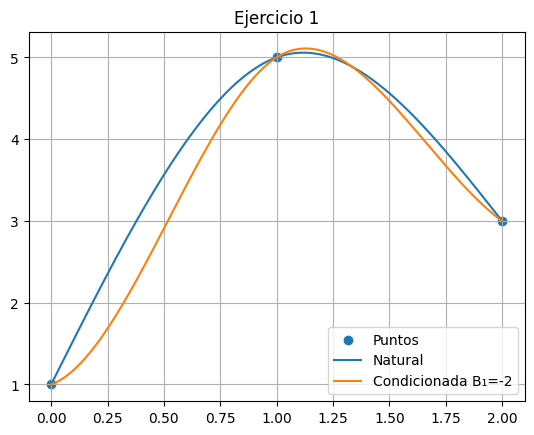


FRONTERA CONDICIONADA (B₀=1, B₁=0)
Intervalo [0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 8.7500(x-0)^2 + -5.7500(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + 1.2500(x-1) + -8.5000(x-1)^2 + 5.2500(x-1)^3


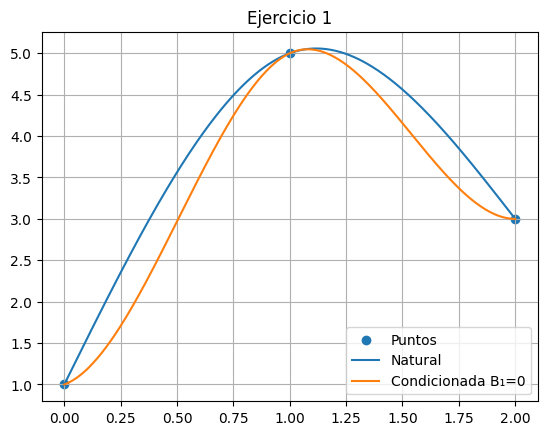


FRONTERA CONDICIONADA (B₀=1, B₁=2)
Intervalo [0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 9.2500(x-0)^2 + -6.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + 0.7500(x-1) + -9.5000(x-1)^2 + 6.7500(x-1)^3


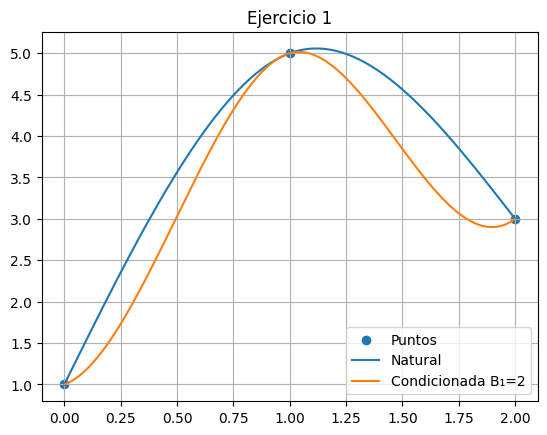


FRONTERA CONDICIONADA (B₀=1, B₁=4)
Intervalo [0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 9.7500(x-0)^2 + -6.7500(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + 0.2500(x-1) + -10.5000(x-1)^2 + 8.2500(x-1)^3


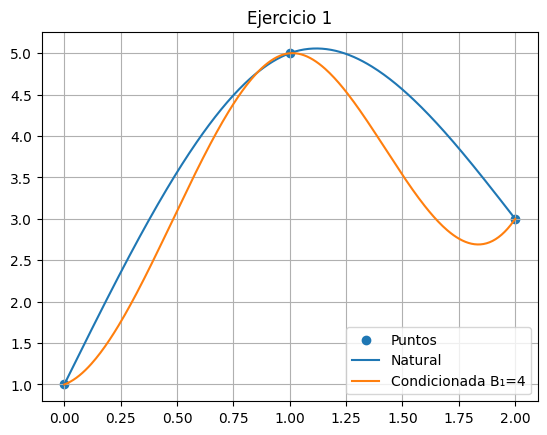


FRONTERA CONDICIONADA (B₀=1, B₁=6)
Intervalo [0, 1]: S_0(x) = 1.0000 + 1.0000(x-0) + 10.2500(x-0)^2 + -7.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = 5.0000 + -0.2500(x-1) + -11.5000(x-1)^2 + 9.7500(x-1)^3


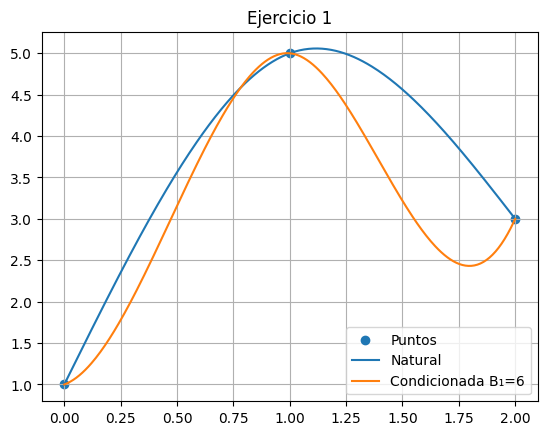

In [9]:
x1 = np.array([0, 1, 2])
y1 = np.array([1, 5, 3])

# Frontera natural
a1_nat, b1_nat, c1_nat, d1_nat = cubic_spline_natural(x1, y1)
coeffs1_nat = (a1_nat, b1_nat, c1_nat, d1_nat)
print_spline_equations(x1, coeffs1_nat, "FRONTERA NATURAL")

# Frontera condicionada con diferentes B1
B0 = 1
B1_values = [-2, 0, 2, 4, 6]

for B1 in B1_values:
    a1_clamp, b1_clamp, c1_clamp, d1_clamp = cubic_spline_clamped(x1, y1, B0, B1)
    coeffs1_clamp = (a1_clamp, b1_clamp, c1_clamp, d1_clamp)
    print_spline_equations(x1, coeffs1_clamp, f"FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})")
    plot_spline(x1, y1, coeffs1_nat, coeffs1_clamp, B1, "Ejercicio 1")


 ## Ejercicio 2: $$(0,-5), (1,-4), (2,3)$$


EJERCICIO 2 - FRONTERA NATURAL
Intervalo [0, 1]: S_0(x) = -5.0000 + -0.5000(x-0) + 0.0000(x-0)^2 + 1.5000(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 4.0000(x-1) + 4.5000(x-1)^2 + -1.5000(x-1)^3

EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=-2)
Intervalo [0, 1]: S_0(x) = -5.0000 + 1.0000(x-0) + -5.2500(x-0)^2 + 5.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 6.2500(x-1) + 10.5000(x-1)^2 + -9.7500(x-1)^3


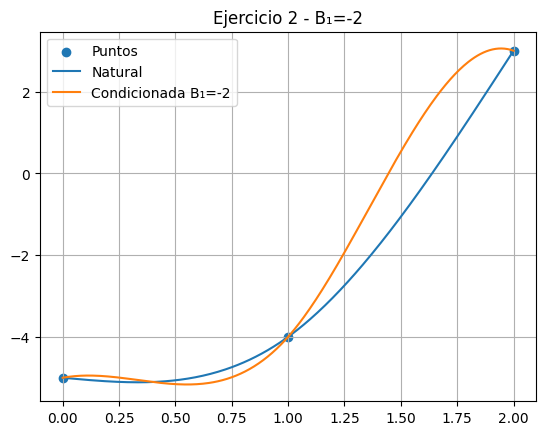


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=0)
Intervalo [0, 1]: S_0(x) = -5.0000 + 1.0000(x-0) + -4.7500(x-0)^2 + 4.7500(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 5.7500(x-1) + 9.5000(x-1)^2 + -8.2500(x-1)^3


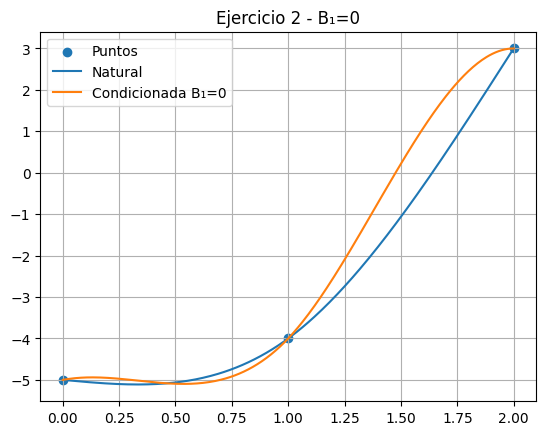


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=2)
Intervalo [0, 1]: S_0(x) = -5.0000 + 1.0000(x-0) + -4.2500(x-0)^2 + 4.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 5.2500(x-1) + 8.5000(x-1)^2 + -6.7500(x-1)^3


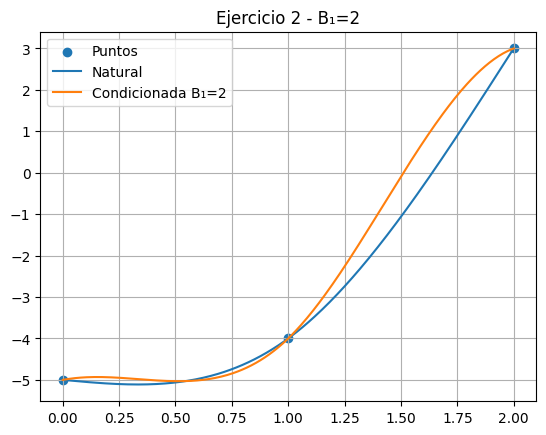


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=4)
Intervalo [0, 1]: S_0(x) = -5.0000 + 1.0000(x-0) + -3.7500(x-0)^2 + 3.7500(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 4.7500(x-1) + 7.5000(x-1)^2 + -5.2500(x-1)^3


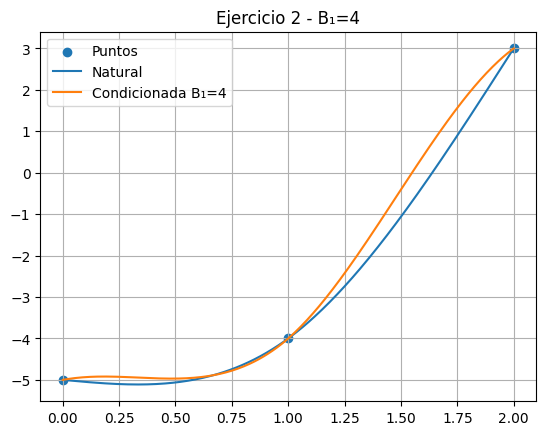


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=6)
Intervalo [0, 1]: S_0(x) = -5.0000 + 1.0000(x-0) + -3.2500(x-0)^2 + 3.2500(x-0)^3
Intervalo [1, 2]: S_1(x) = -4.0000 + 4.2500(x-1) + 6.5000(x-1)^2 + -3.7500(x-1)^3


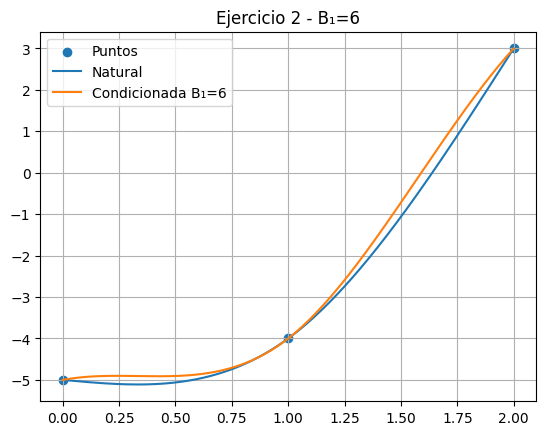

In [4]:
# Nuevos puntos del ejercicio 2
x2 = np.array([0, 1, 2])
y2 = np.array([-5, -4, 3])

# --- Frontera natural ---
a2_nat, b2_nat, c2_nat, d2_nat = cubic_spline_natural(x2, y2)
coeffs2_nat = (a2_nat, b2_nat, c2_nat, d2_nat)
print_spline_equations(x2, coeffs2_nat, "EJERCICIO 2 - FRONTERA NATURAL")

# --- Frontera condicionada con diferentes B1 ---
B0 = 1          # o el valor que te pidan en el ejercicio
B1_values = [-2, 0, 2, 4, 6]

for B1 in B1_values:
    a2_clamp, b2_clamp, c2_clamp, d2_clamp = cubic_spline_clamped(x2, y2, B0, B1)
    coeffs2_clamp = (a2_clamp, b2_clamp, c2_clamp, d2_clamp)

    print_spline_equations(
        x2,
        coeffs2_clamp,
        f"EJERCICIO 2 - FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})"
    )

    plot_spline(
        x2,
        y2,
        coeffs2_nat,
        coeffs2_clamp,
        B1,
        f"Ejercicio 2 - B₁={B1}"
    )


3. $$(0,-1), (1,1), (2,5), (3,2)$$
- $x_0 = 0$, $y_0 = 1$
- $x_1 = 1$, $y_1 = 1$
- $x_2 = 2$, $y_2 = 5$
- $x_3 = 3$, $y_3 = 2$


EJERCICIO 2 - FRONTERA NATURAL
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + 0.0000(x-0)^2 + 1.0000(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.0000(x-1) + 3.0000(x-1)^2 + -3.0000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + 1.0000(x-2) + -6.0000(x-2)^2 + 2.0000(x-2)^3

EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=-2)
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + -0.2000(x-0)^2 + 1.2000(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.2000(x-1) + 3.4000(x-1)^2 + -3.6000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + 0.2000(x-2) + -7.4000(x-2)^2 + 4.2000(x-2)^3


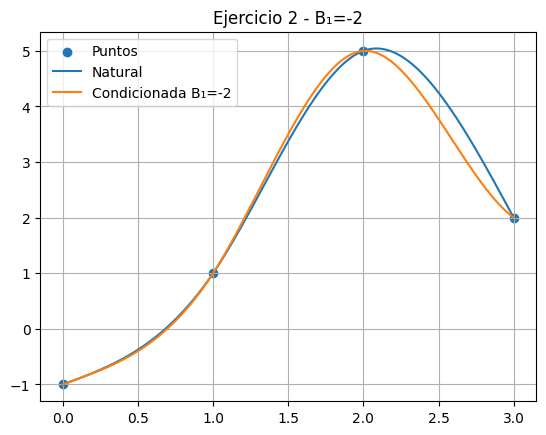


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=0)
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + -0.3333(x-0)^2 + 1.3333(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.3333(x-1) + 3.6667(x-1)^2 + -4.0000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + -0.3333(x-2) + -8.3333(x-2)^2 + 5.6667(x-2)^3


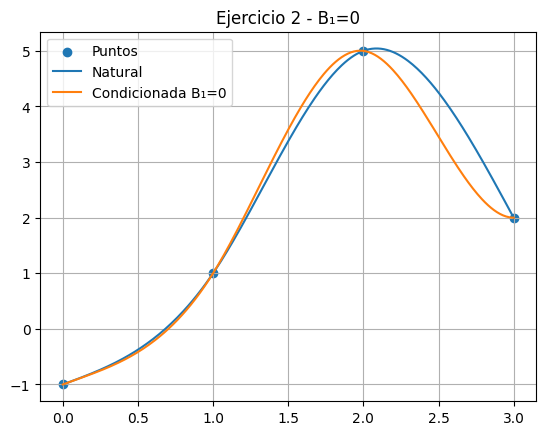


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=2)
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + -0.4667(x-0)^2 + 1.4667(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.4667(x-1) + 3.9333(x-1)^2 + -4.4000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + -0.8667(x-2) + -9.2667(x-2)^2 + 7.1333(x-2)^3


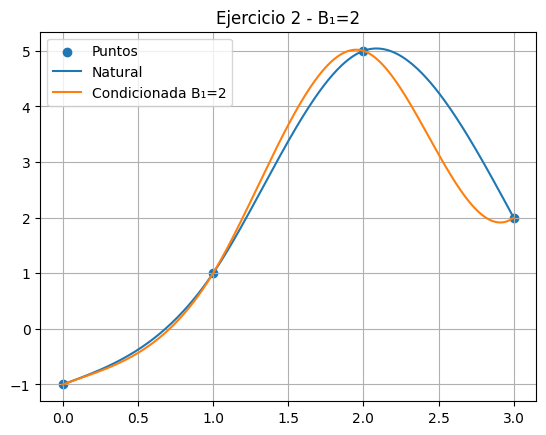


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=4)
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + -0.6000(x-0)^2 + 1.6000(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.6000(x-1) + 4.2000(x-1)^2 + -4.8000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + -1.4000(x-2) + -10.2000(x-2)^2 + 8.6000(x-2)^3


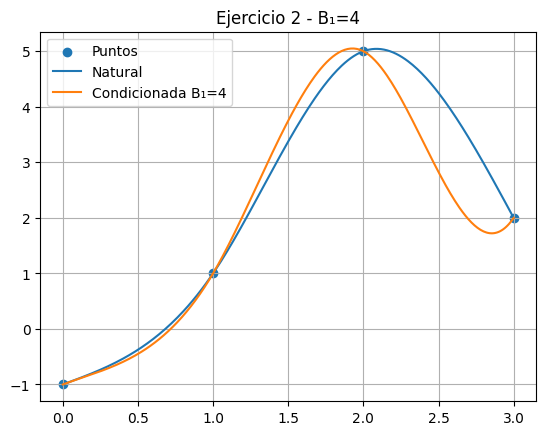


EJERCICIO 2 - FRONTERA CONDICIONADA (B₀=1, B₁=6)
Intervalo [0, 1]: S_0(x) = -1.0000 + 1.0000(x-0) + -0.7333(x-0)^2 + 1.7333(x-0)^3
Intervalo [1, 2]: S_1(x) = 1.0000 + 4.7333(x-1) + 4.4667(x-1)^2 + -5.2000(x-1)^3
Intervalo [2, 3]: S_2(x) = 5.0000 + -1.9333(x-2) + -11.1333(x-2)^2 + 10.0667(x-2)^3


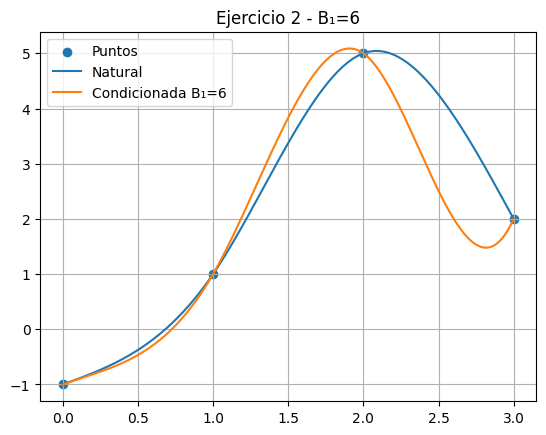

In [ ]:
# Nuevos puntos del ejercicio 3
x2 = np.array([0, 1, 2, 3])
y2 = np.array([-1, 1, 5, 2])

# --- Frontera natural ---
a2_nat, b2_nat, c2_nat, d2_nat = cubic_spline_natural(x2, y2)
coeffs2_nat = (a2_nat, b2_nat, c2_nat, d2_nat)
print_spline_equations(x2, coeffs2_nat, "EJERCICIO 2 - FRONTERA NATURAL")

# --- Frontera condicionada con diferentes B1 ---
B0 = 1          # o el valor que te pidan en el ejercicio
B1_values = [-2, 0, 2, 4, 6]

for B1 in B1_values:
    a2_clamp, b2_clamp, c2_clamp, d2_clamp = cubic_spline_clamped(x2, y2, B0, B1)
    coeffs2_clamp = (a2_clamp, b2_clamp, c2_clamp, d2_clamp)

    print_spline_equations(
        x2,
        coeffs2_clamp,
        f"EJERCICIO 2 - FRONTERA CONDICIONADA (B₀={B0}, B₁={B1})"
    )

    plot_spline(
        x2,
        y2,
        coeffs2_nat,
        coeffs2_clamp,
        B1,
        f"Ejercicio 2 - B₁={B1}"
    )
